In [1]:
from src.dataloader import *
from src.confusion_matrix import make_confusion_matrix

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.nn as nn
from sklearn.metrics import confusion_matrix


import tensorflow as tf
import keras
import keras.layers as layers
from keras.losses import BinaryCrossentropy


In [2]:
tf.random.set_seed(42)

# Import des données

In [3]:
label_attribution = LabelAttribution(path_image_google="C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                     path_mask_google='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/mask/',
                                     path_metadata='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/metadata.csv',
                                     colonne_identifiant='identifiant',
                                     path_export_train_test="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps",
                                     path_image_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/img',
                                     path_mask_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/mask/',
                                     use_img_google=True,
                                     use_img_ign=False
                                     )


In [4]:
label_attribution.run()


Le LeNET5 a été conçu pour prendre en entrée des images de dimension 28*28. On passe donc les images 400 x 400 en 28 x 28. On convertit ensuite ces dernières en tenseurs. 

In [5]:
path_train = "C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/train_data.csv"
path_test = "C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/test_data.csv"

transformed_train_dataset = CustomImageDataset(path_train, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
]))
transformed_test_dataset = CustomImageDataset(path_test, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                              transform=transforms.Compose([
                                                  transforms.Resize(28),
                                                  transforms.ToTensor(),
                                              ]))


In [6]:
print("Nombre d'images dans le train: {}".format(
    transformed_train_dataset.__len__()))
print("Nombre d'images dans le test: {}".format(
    transformed_test_dataset.__len__()))


Nombre d'images dans le train: 23045
Nombre d'images dans le test: 5762


In [7]:
train_dataloader = DataLoader(
    transformed_train_dataset, batch_size=23045, shuffle=True)
test_dataloader = DataLoader(
    transformed_test_dataset, batch_size=5762, shuffle=True)


# LeNet5: implémentation et apprentissage

## Absence de data augmentations

On entraîne le LeNet5 sans data augmentations. Nous fixons les hyper-paramètres de façon arbitraire dans un premier temps:
* Learning rate: 0,01
* Momentum: 0,9
* Dropout: 0,2
* epochs: 10
* batch size: 32

In [8]:
X_train, Y_train = next(iter(train_dataloader))
X_test, Y_test = next(iter(test_dataloader))

X_train_permute = X_train.permute(0, 2, 3, 1)
X_test_permute = X_test.permute(0, 2, 3, 1)


In [9]:
from src.lenet5 import buildModel

model_init = buildModel()

history = model_init.fit(x=X_train_permute.numpy(), y=Y_train.numpy(),
                         validation_data=(
                             X_test_permute.numpy(), Y_test.numpy()),
                         batch_size=32,
                         epochs=10)


Epoch 1/10
721/721 [==============================] - 7s 8ms/step - loss: 0.5206 - Accuracy: 0.7642 - recall_m: 0.7838 - precision_m: 0.7821 - f1_m: 0.7732 - val_loss: 0.4813 - val_Accuracy: 0.7787 - val_recall_m: 0.9137 - val_precision_m: 0.7390 - val_f1_m: 0.8135
Epoch 2/10
721/721 [==============================] - 6s 8ms/step - loss: 0.4594 - Accuracy: 0.8079 - recall_m: 0.8214 - precision_m: 0.8187 - f1_m: 0.8139 - val_loss: 0.4250 - val_Accuracy: 0.8285 - val_recall_m: 0.8731 - val_precision_m: 0.8187 - val_f1_m: 0.8420
Epoch 3/10
721/721 [==============================] - 6s 8ms/step - loss: 0.4322 - Accuracy: 0.8230 - recall_m: 0.8371 - precision_m: 0.8318 - f1_m: 0.8294 - val_loss: 0.4136 - val_Accuracy: 0.8334 - val_recall_m: 0.8765 - val_precision_m: 0.8236 - val_f1_m: 0.8464
Epoch 4/10
721/721 [==============================] - 6s 8ms/step - loss: 0.4189 - Accuracy: 0.8277 - recall_m: 0.8348 - precision_m: 0.8398 - f1_m: 0.8324 - val_loss: 0.3908 - val_Accuracy: 0.8410 - va

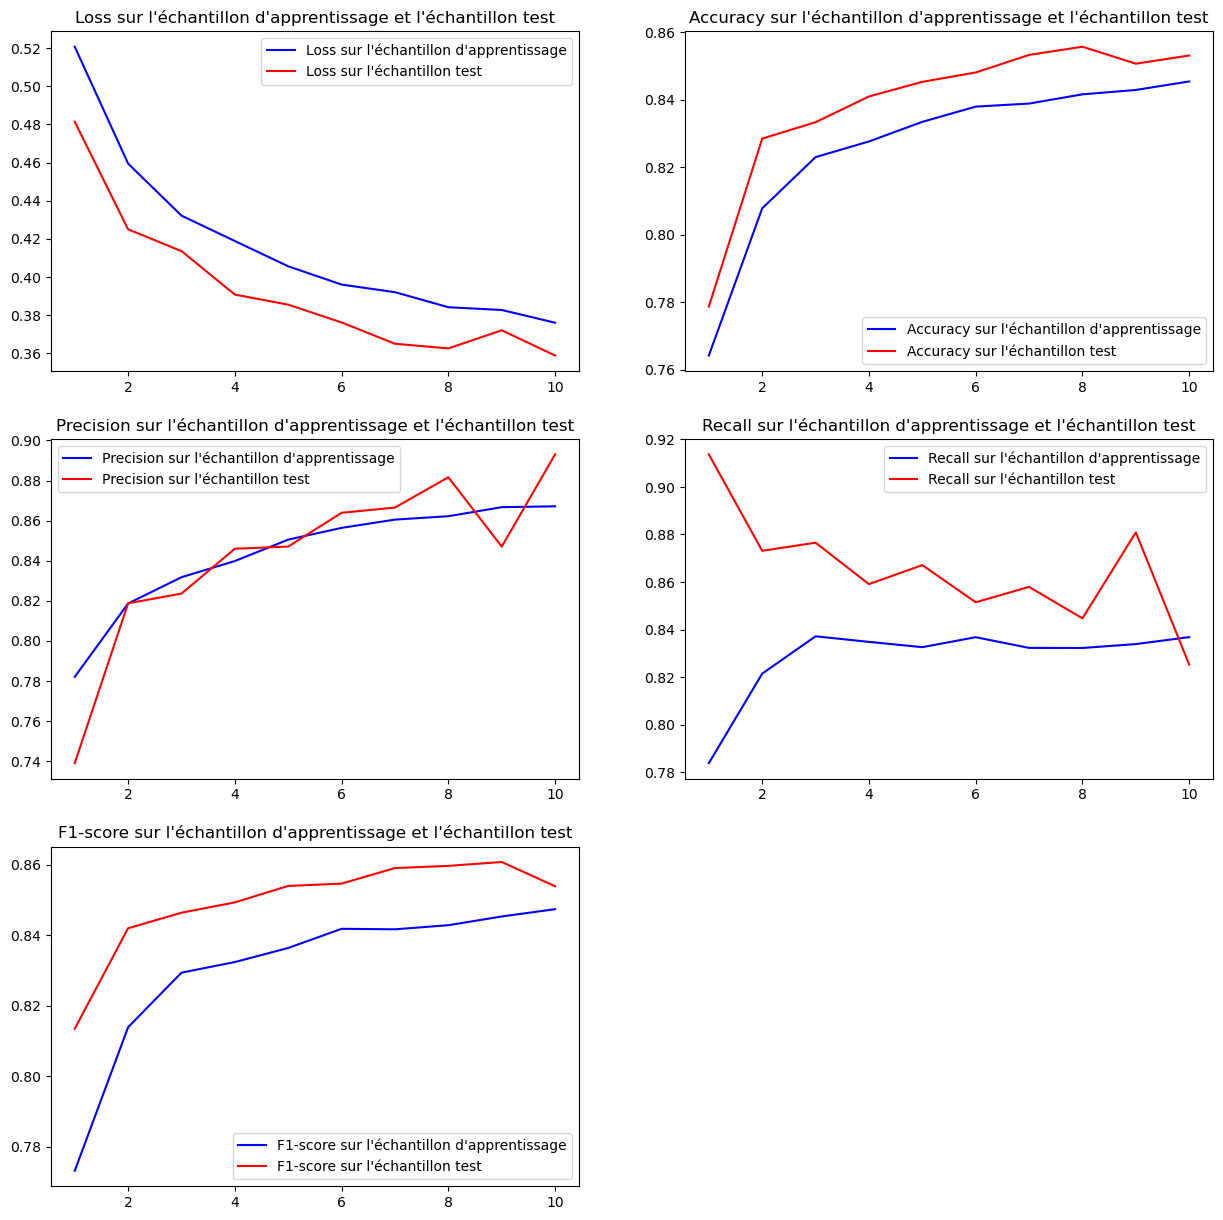

In [19]:
recall = history.history['recall_m']
val_recall = history.history['val_recall_m']

accuracy = history.history['Accuracy']
val_accuracy = history.history['val_Accuracy']

precision = history.history['precision_m']
val_precision = history.history['val_precision_m']

f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(recall) + 1)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(epochs, loss, 'b', label="Loss sur l'échantillon d'apprentissage")
axs[0, 0].plot(epochs, val_loss, 'b', label="Loss sur l'échantillon test", color="red")
axs[0, 0].set_title("Loss sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 0].legend()

axs[0, 1].plot(epochs, accuracy, 'b', label="Accuracy sur l'échantillon d'apprentissage")
axs[0, 1].plot(epochs, val_accuracy, 'b', label="Accuracy sur l'échantillon test", color="red")
axs[0, 1].set_title("Accuracy sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 1].legend()

axs[1, 0].plot(epochs, precision, 'b', label="Precision sur l'échantillon d'apprentissage")
axs[1, 0].plot(epochs, val_precision, 'b', label="Precision sur l'échantillon test", color="red")
axs[1, 0].set_title("Precision sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 0].legend()

axs[1, 1].plot(epochs, recall, 'b', label="Recall sur l'échantillon d'apprentissage")
axs[1, 1].plot(epochs, val_recall, 'b', label="Recall sur l'échantillon test", color="red")
axs[1, 1].set_title("Recall sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 1].legend()

axs[2, 0].plot(epochs, f1, 'b', label="F1-score sur l'échantillon d'apprentissage")
axs[2, 0].plot(epochs, val_f1, 'b', label="F1-score sur l'échantillon test", color="red")
axs[2, 0].set_title("F1-score sur l'échantillon d'apprentissage et l'échantillon test")
axs[2, 0].legend()

fig.delaxes(axs[2,1]) # The indexing is zero-based here


In [21]:
train_loss, train_accuracy, train_recall, train_precision, train_f1score = model_init.evaluate(
    X_train_permute.numpy(), Y_train.numpy(), verbose=0)
print("Loss sur l'échantillon train: {}".format(round(train_loss, 3)))
print("Accuracy sur l'échantillon train: {}".format(round(train_accuracy, 3)))
print("Recall sur l'échantillon train: {}".format(round(train_recall, 3)))
print("Precision sur l'échantillon train: {}".format(round(train_precision, 3)))
print("F1-score sur l'échantillon train: {}".format(round(train_f1score, 3)))


Loss sur l'échantillon train: 0.349
Accuracy sur l'échantillon train: 0.861
Recall sur l'échantillon train: 0.828
Precision sur l'échantillon train: 0.902
F1-score sur l'échantillon train: 0.859


In [22]:
loss, accuracy, recall, precision, f1score = model_init.evaluate(
    X_test_permute.numpy(), Y_test.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss, 3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy, 3)))
print("Recall sur l'échantillon test: {}".format(round(recall, 3)))
print("Precision sur l'échantillon test: {}".format(round(precision, 3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score, 3)))


Loss sur l'échantillon test: 0.359
Accuracy sur l'échantillon test: 0.853
Recall sur l'échantillon test: 0.825
Precision sur l'échantillon test: 0.893
F1-score sur l'échantillon test: 0.854


In [23]:
prob_predict = model_init.predict(X_test_permute.numpy())
y_pred = (np.squeeze(prob_predict) > 0.5).astype("int32")


181/181 [==============================] - 0s 2ms/step


In [25]:
unique, counts = np.unique(y_pred, return_counts=True)
res = dict(zip(unique, counts))
print("Nombre d'images prédites avec panneaux: {}".format(res[1]))
print("Nombre d'images prédites sans panneau: {}".format(res[0]))


Nombre d'images prédites avec panneaux: 2883
Nombre d'images prédites sans panneau: 2879


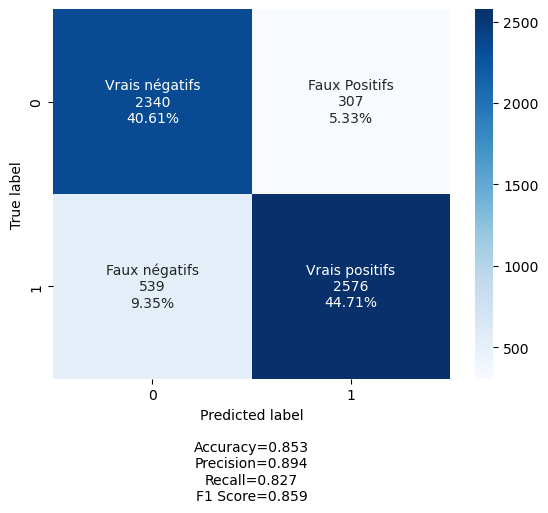

In [26]:
r = confusion_matrix(Y_test, y_pred)

labels = ["Vrais négatifs", "Faux Positifs", "Faux négatifs", "Vrais positifs"]
categories = ["0", "1"]
make_confusion_matrix(r,
                      group_names=labels,
                      categories=categories,
                      )


In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

FPR, TPR, thresholds_keras = roc_curve(Y_test.numpy(), prob_predict)
AUC = auc(FPR, TPR)
print("AUC: {}".format(round(AUC, 2)))


AUC: 0.92


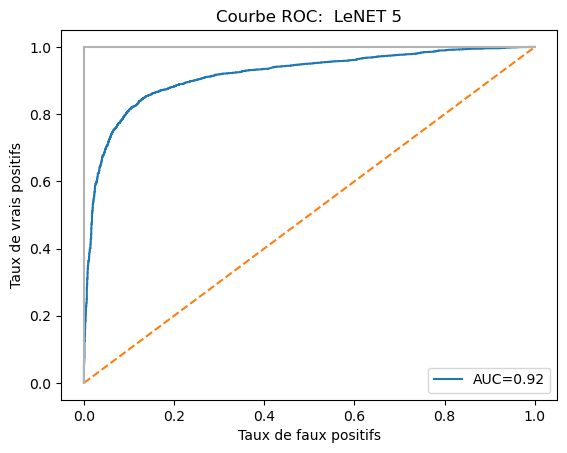

In [28]:
from matplotlib import pyplot as plt
# plot the roc curve for the model

plt.title('Courbe ROC:  LeNET 5')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC, 2)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()


## Ajout de data augmentations

In [29]:
transformed_train_dataset = CustomImageDataset(path_train, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
    transforms.Resize(28),
    transforms.ColorJitter(brightness=(0.6, 1.4), contrast=(
        0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.5, 0.5)),
    transforms.RandomCrop(20),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.Resize(28),
    transforms.ToTensor(),

]))

# On resize uniquement sur le test
transformed_test_dataset = CustomImageDataset(path_test, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                              transform=transforms.Compose([
                                                  transforms.Resize(28),
                                                  transforms.ToTensor(),
                                              ]))


In [30]:
train_dataloader = DataLoader(
    transformed_train_dataset, batch_size=23045, shuffle=True)
test_dataloader = DataLoader(
    transformed_test_dataset, batch_size=5762, shuffle=True)


On normalise les données d'apprentissage et de test

In [31]:
mean_train, std_train = mean_std(train_dataloader)
print("Moyenne par channel: {}".format(mean_train.tolist()))
print("Ecart-type par channel: {}".format(std_train.tolist()))


Moyenne par channel: [0.2973630428314209, 0.297685444355011, 0.29714763164520264]
Ecart-type par channel: [0.19030016660690308, 0.1901288479566574, 0.1905093938112259]


In [32]:
mean_test, std_test = mean_std(test_dataloader)
print("Moyenne par channel: {}".format(mean_test.tolist()))
print("Ecart-type par channel: {}".format(std_test.tolist()))


Moyenne par channel: [0.34999263286590576, 0.35766637325286865, 0.308106392621994]
Ecart-type par channel: [0.16761955618858337, 0.14885342121124268, 0.1473139077425003]


In [33]:
normalized_train_dataset = CustomImageDataset(path_train, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
    transforms.Resize(28),
    transforms.ColorJitter(brightness=(0.6, 1.4), contrast=(
        0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.5, 0.5)),
    transforms.RandomCrop(20),
    transforms.RandomHorizontalFlip(
        p=0.5),
    transforms.RandomVerticalFlip(
        p=0.5),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_train.tolist(),
                         std=std_train.tolist()),

]))


normalize_test_dataset = CustomImageDataset(path_test, "C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                            transform=transforms.Compose([
                                                transforms.Resize(28),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=mean_test.tolist(),
                                                                     std=std_test.tolist()),
                                            ]))
train_dataloader_augmente = DataLoader(
    normalized_train_dataset, batch_size=23045, shuffle=True)
test_dataloader_augmente = DataLoader(
    normalize_test_dataset, batch_size=5762, shuffle=True)


## Apprentissage avec data augmentations

In [34]:
X_train_augmente, Y_train_augmente = next(iter(train_dataloader_augmente))
X_test_augmente, Y_test_augmente = next(iter(test_dataloader_augmente))

X_train_augmente_permute = X_train_augmente.permute(0, 2, 3, 1)
X_test_augmente_permute = X_test_augmente.permute(0, 2, 3, 1)


In [35]:
model_augmente = buildModel()

history_augmente = model_augmente.fit(x=X_train_augmente_permute.numpy(), y=Y_train_augmente.numpy(),
                                      validation_data=(
                                          X_test_augmente_permute.numpy(), Y_test_augmente.numpy()),
                                      batch_size=32,
                                      epochs=10)


Epoch 1/10
721/721 [==============================] - 5s 7ms/step - loss: 0.6738 - Accuracy: 0.5856 - recall_m: 0.6600 - precision_m: 0.6003 - f1_m: 0.6207 - val_loss: 0.6420 - val_Accuracy: 0.6446 - val_recall_m: 0.7131 - val_precision_m: 0.6586 - val_f1_m: 0.6777
Epoch 2/10
721/721 [==============================] - 5s 7ms/step - loss: 0.6585 - Accuracy: 0.6093 - recall_m: 0.6581 - precision_m: 0.6286 - f1_m: 0.6335 - val_loss: 0.6073 - val_Accuracy: 0.6739 - val_recall_m: 0.8003 - val_precision_m: 0.6667 - val_f1_m: 0.7216
Epoch 3/10
721/721 [==============================] - 5s 6ms/step - loss: 0.6245 - Accuracy: 0.6532 - recall_m: 0.6985 - precision_m: 0.6656 - f1_m: 0.6729 - val_loss: 0.6076 - val_Accuracy: 0.6734 - val_recall_m: 0.7939 - val_precision_m: 0.6660 - val_f1_m: 0.7184
Epoch 4/10
721/721 [==============================] - 5s 7ms/step - loss: 0.6058 - Accuracy: 0.6698 - recall_m: 0.7433 - precision_m: 0.6701 - f1_m: 0.6979 - val_loss: 0.5815 - val_Accuracy: 0.7039 - va

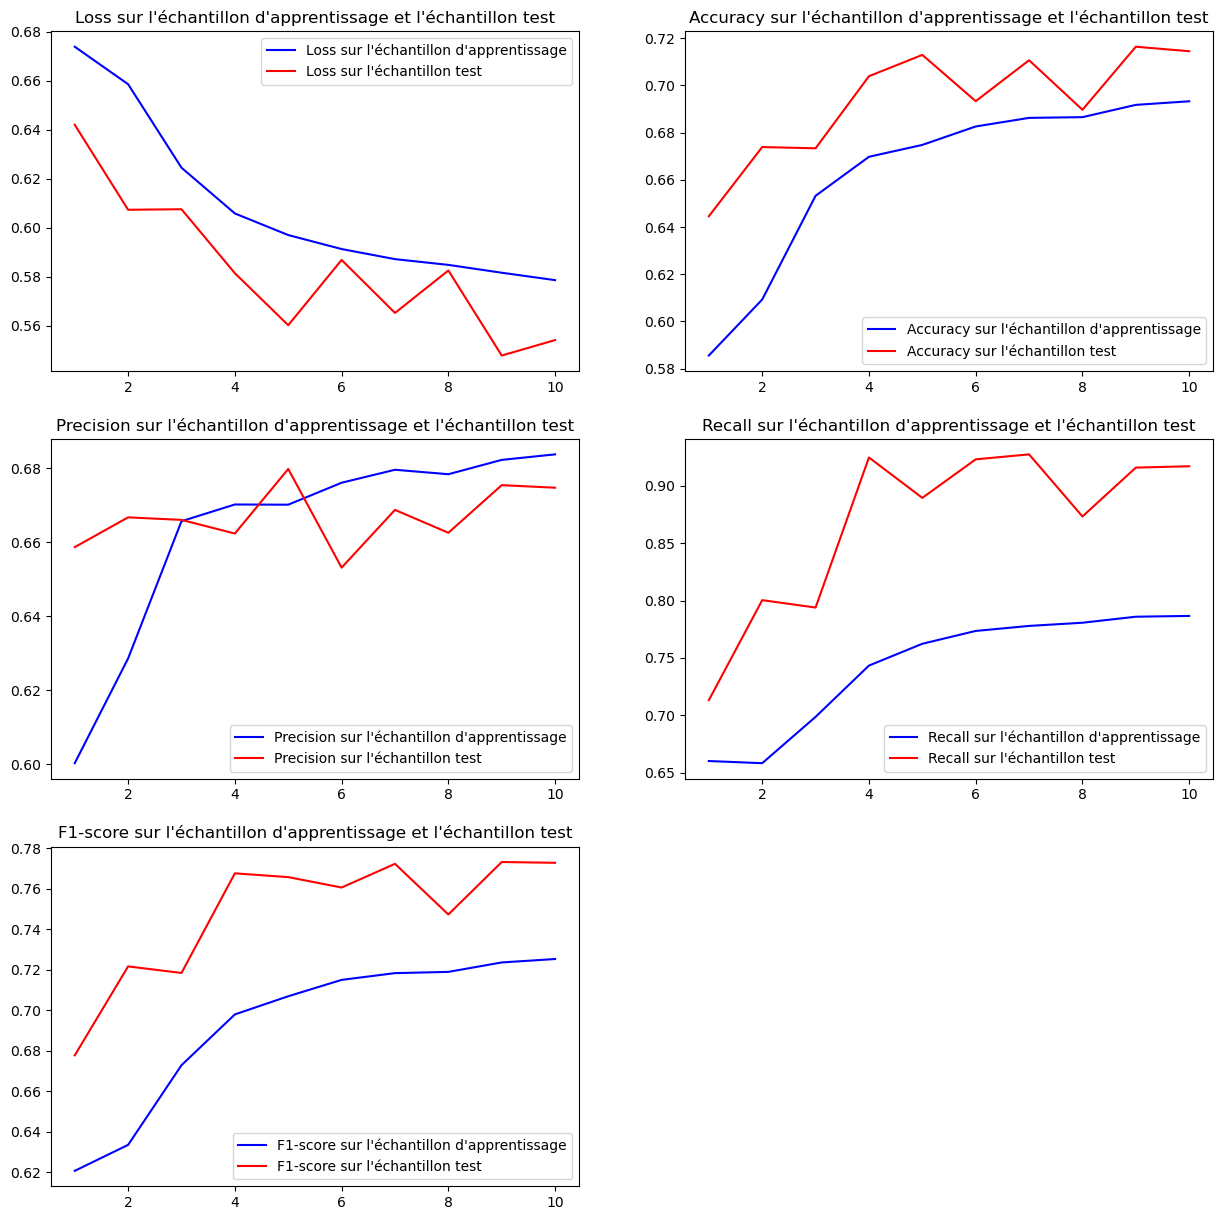

In [36]:
recall_augmente = history_augmente.history['recall_m']
val_recall_augmente = history_augmente.history['val_recall_m']

accuracy_augmente = history_augmente.history['Accuracy']
val_accuracy_augmente = history_augmente.history['val_Accuracy']

precision_augmente = history_augmente.history['precision_m']
val_precision_augmente = history_augmente.history['val_precision_m']

f1_augmente = history_augmente.history['f1_m']
val_f1_augmente = history_augmente.history['val_f1_m']

loss_augmente = history_augmente.history['loss']
val_loss_augmente = history_augmente.history['val_loss']

epochs_augmente = range(1, len(recall_augmente) + 1)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(epochs_augmente, loss_augmente, 'b', label="Loss sur l'échantillon d'apprentissage")
axs[0, 0].plot(epochs_augmente, val_loss_augmente, 'b', label="Loss sur l'échantillon test", color="red")
axs[0, 0].set_title("Loss sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 0].legend()

axs[0, 1].plot(epochs_augmente, accuracy_augmente, 'b', label="Accuracy sur l'échantillon d'apprentissage")
axs[0, 1].plot(epochs_augmente, val_accuracy_augmente, 'b', label="Accuracy sur l'échantillon test", color="red")
axs[0, 1].set_title("Accuracy sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 1].legend()

axs[1, 0].plot(epochs_augmente, precision_augmente, 'b', label="Precision sur l'échantillon d'apprentissage")
axs[1, 0].plot(epochs_augmente, val_precision_augmente, 'b', label="Precision sur l'échantillon test", color="red")
axs[1, 0].set_title("Precision sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 0].legend()

axs[1, 1].plot(epochs_augmente, recall_augmente, 'b', label="Recall sur l'échantillon d'apprentissage")
axs[1, 1].plot(epochs_augmente, val_recall_augmente, 'b', label="Recall sur l'échantillon test", color="red")
axs[1, 1].set_title("Recall sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 1].legend()

axs[2, 0].plot(epochs_augmente, f1_augmente, 'b', label="F1-score sur l'échantillon d'apprentissage")
axs[2, 0].plot(epochs_augmente, val_f1_augmente, 'b', label="F1-score sur l'échantillon test", color="red")
axs[2, 0].set_title("F1-score sur l'échantillon d'apprentissage et l'échantillon test")
axs[2, 0].legend()

fig.delaxes(axs[2,1]) # The indexing is zero-based here


In [37]:
loss_augmente_train, accuracy_augmente_train, recall_augmente_train, precision_augmente_train, f1score_augmente_train = model_augmente.evaluate(
    X_train_augmente_permute.numpy(), Y_train_augmente.numpy(), verbose=0)
print("Loss sur l'échantillon train: {}".format(round(loss_augmente_train, 3)))
print("Accuracy sur l'échantillon train: {}".format(round(accuracy_augmente_train, 3)))
print("Recall sur l'échantillon train: {}".format(round(recall_augmente_train, 3)))
print("Precision sur l'échantillon train: {}".format(round(precision_augmente_train, 3)))
print("F1-score sur l'échantillon train: {}".format(round(f1score_augmente_train, 3)))

Loss sur l'échantillon train: 0.556
Accuracy sur l'échantillon train: 0.708
Recall sur l'échantillon train: 0.796
Precision sur l'échantillon train: 0.696
F1-score sur l'échantillon train: 0.738


In [38]:
loss_augmente, accuracy_augmente, recall_augmente, precision_augmente, f1score_augmente = model_augmente.evaluate(
    X_test_augmente_permute.numpy(), Y_test_augmente.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss_augmente, 3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy_augmente, 3)))
print("Recall sur l'échantillon test: {}".format(round(recall_augmente, 3)))
print("Precision sur l'échantillon test: {}".format(round(precision_augmente, 3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score_augmente, 3)))


Loss sur l'échantillon test: 0.554
Accuracy sur l'échantillon test: 0.715
Recall sur l'échantillon test: 0.917
Precision sur l'échantillon test: 0.675
F1-score sur l'échantillon test: 0.773


In [39]:
prob_predict_augmente = model_augmente.predict(X_test_augmente_permute.numpy())
y_pred_augmente = (np.squeeze(prob_predict_augmente) > 0.5).astype("int32")


181/181 [==============================] - 0s 2ms/step


In [40]:
unique_augmente, counts_augmente = np.unique(
    y_pred_augmente, return_counts=True)
res_augmente = dict(zip(unique_augmente, counts_augmente))
print("Nombre d'images prédites avec panneaux: {}".format(res_augmente[1]))
print("Nombre d'images prédites sans panneau: {}".format(res_augmente[0]))


Nombre d'images prédites avec panneaux: 4236
Nombre d'images prédites sans panneau: 1526


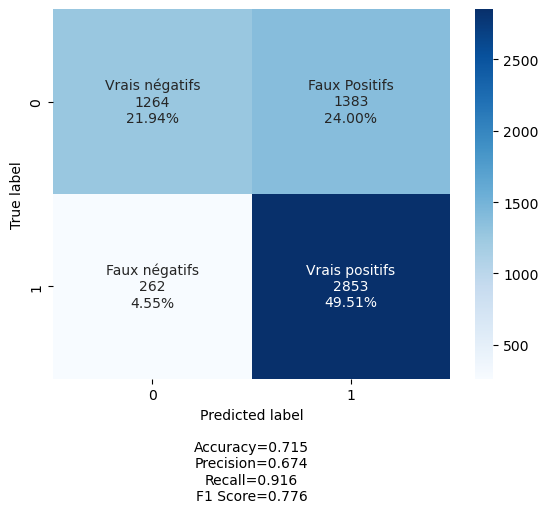

In [41]:

r = confusion_matrix(Y_test_augmente, y_pred_augmente)

labels = ["Vrais négatifs", "Faux Positifs", "Faux négatifs", "Vrais positifs"]
categories = ["0", "1"]
make_confusion_matrix(r,
                      group_names=labels,
                      categories=categories,
                      )


In [42]:
FPR_augmente, TPR_augmente, thresholds_keras_augmente = roc_curve(
    Y_test_augmente.numpy(), prob_predict_augmente)
AUC_augmente = auc(FPR_augmente, TPR_augmente)
print("AUC: {}".format(round(AUC_augmente, 2)))


AUC: 0.78


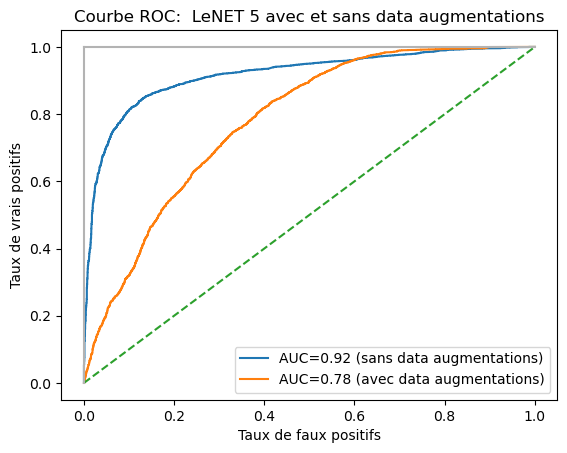

In [43]:
plt.title('Courbe ROC:  LeNET 5 avec et sans data augmentations')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC, 2)) +
         " (sans data augmentations)")
plt.plot(FPR_augmente, TPR_augmente, label="AUC=" +
         str(round(AUC_augmente, 2))+" (avec data augmentations)")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()


# Hyperparamétrisation du modèle: random search

https://pyimagesearch.com/2021/05/31/hyperparameter-tuning-for-deep-learning-with-scikit-learn-keras-and-tensorflow/

In [37]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import RandomizedSearchCV

# learnRate = [1e-2, 1e-3, 1e-4]
# momentum = [0.9, 0.99]
# dropout1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout4 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# batchSize = [4, 8, 16, 32, 64, 128, 256]
# epochs = [10, 20, 30, 40, 50]

# grid = dict(
#     learnRate=learnRate,
#     momentum=momentum,
#     dropout1=dropout1,
#     dropout2=dropout2,
#     dropout3=dropout3,
#     dropout4=dropout4,
#     batch_size=batchSize,
#     epochs=epochs
# )

# model = KerasClassifier(build_fn=buildModel, verbose=1)
# #grid = GridSearchCV(estimator=model, param_grid=hyperMatrix)

# # n_iter: nombre de modèles entrainés
# searcher = RandomizedSearchCV(
#     estimator=model, cv=5, n_iter=10, param_distributions=grid, scoring='recall')
# searchResults = searcher.fit(
#     X_train_augmente_permute.numpy(), Y_train_augmente.numpy())


Epoch 1/40
1153/1153 [==============================] - 9s 7ms/step - loss: 1.1712 - Accuracy: 0.5087 - recall_m: 0.5413 - precision_m: 0.5368 - f1_m: 0.5236
Epoch 2/40
1153/1153 [==============================] - 6s 5ms/step - loss: 1.2736 - Accuracy: 0.5100 - recall_m: 0.5442 - precision_m: 0.5392 - f1_m: 0.5266
Epoch 3/40
1153/1153 [==============================] - 8s 7ms/step - loss: 1.3057 - Accuracy: 0.5036 - recall_m: 0.5371 - precision_m: 0.5310 - f1_m: 0.5199
Epoch 4/40
1153/1153 [==============================] - 6s 5ms/step - loss: 1.2746 - Accuracy: 0.5082 - recall_m: 0.5469 - precision_m: 0.5370 - f1_m: 0.5267
Epoch 5/40
1153/1153 [==============================] - 8s 7ms/step - loss: 1.3077 - Accuracy: 0.5056 - recall_m: 0.5416 - precision_m: 0.5345 - f1_m: 0.5220
Epoch 6/40
1153/1153 [==============================] - 6s 5ms/step - loss: 1.3346 - Accuracy: 0.5042 - recall_m: 0.5353 - precision_m: 0.5340 - f1_m: 0.5190
Epoch 7/40
1153/1153 [==============================

In [38]:
# # summarize grid search information
# bestScore = searchResults.best_score_
# bestParams = searchResults.best_params_
# print("[INFO] best score is {} using {}".format(round(bestScore, 3),
#                                                 bestParams))


[INFO] best score is 0.896 using {'momentum': 0.99, 'learnRate': 0.001, 'epochs': 20, 'dropout4': 0.1, 'dropout3': 0.7, 'dropout2': 0.7, 'dropout1': 0.6, 'batch_size': 32}


In [39]:
# searchResults.cv_results_["mean_test_score"]


array([0.6096977 , 0.65432337, 0.66908522, 0.87451248, 0.6831274 ,
       0.66342882, 0.89580364, 0.80827022, 0.56416038, 0.60200855])

# Résultats sur le modèle optimisé

In [44]:
best_model = buildModel(learnRate=0.001, dropout1=0.6, dropout2=0.7,
                        dropout3=0.7, dropout4=0.4, momentum=0.99)

history_best = best_model.fit(x=X_train_augmente_permute.numpy(), y=Y_train_augmente.numpy(),
                              validation_data=(
                                  X_test_augmente_permute.numpy(), Y_test_augmente.numpy()),
                              batch_size=32,
                              epochs=20)


Epoch 1/20
721/721 [==============================] - 6s 8ms/step - loss: 0.7123 - Accuracy: 0.5358 - recall_m: 0.6316 - precision_m: 0.5540 - f1_m: 0.5835 - val_loss: 0.6800 - val_Accuracy: 0.5831 - val_recall_m: 0.6214 - val_precision_m: 0.6171 - val_f1_m: 0.6107
Epoch 2/20
721/721 [==============================] - 5s 7ms/step - loss: 0.6923 - Accuracy: 0.5563 - recall_m: 0.6599 - precision_m: 0.5702 - f1_m: 0.6053 - val_loss: 0.6582 - val_Accuracy: 0.6201 - val_recall_m: 0.7197 - val_precision_m: 0.6333 - val_f1_m: 0.6656
Epoch 3/20
721/721 [==============================] - 5s 7ms/step - loss: 0.6906 - Accuracy: 0.5622 - recall_m: 0.6620 - precision_m: 0.5765 - f1_m: 0.6093 - val_loss: 0.6548 - val_Accuracy: 0.6274 - val_recall_m: 0.7378 - val_precision_m: 0.6355 - val_f1_m: 0.6755
Epoch 4/20
721/721 [==============================] - 5s 8ms/step - loss: 0.6878 - Accuracy: 0.5686 - recall_m: 0.6578 - precision_m: 0.5805 - f1_m: 0.6086 - val_loss: 0.6565 - val_Accuracy: 0.6220 - va

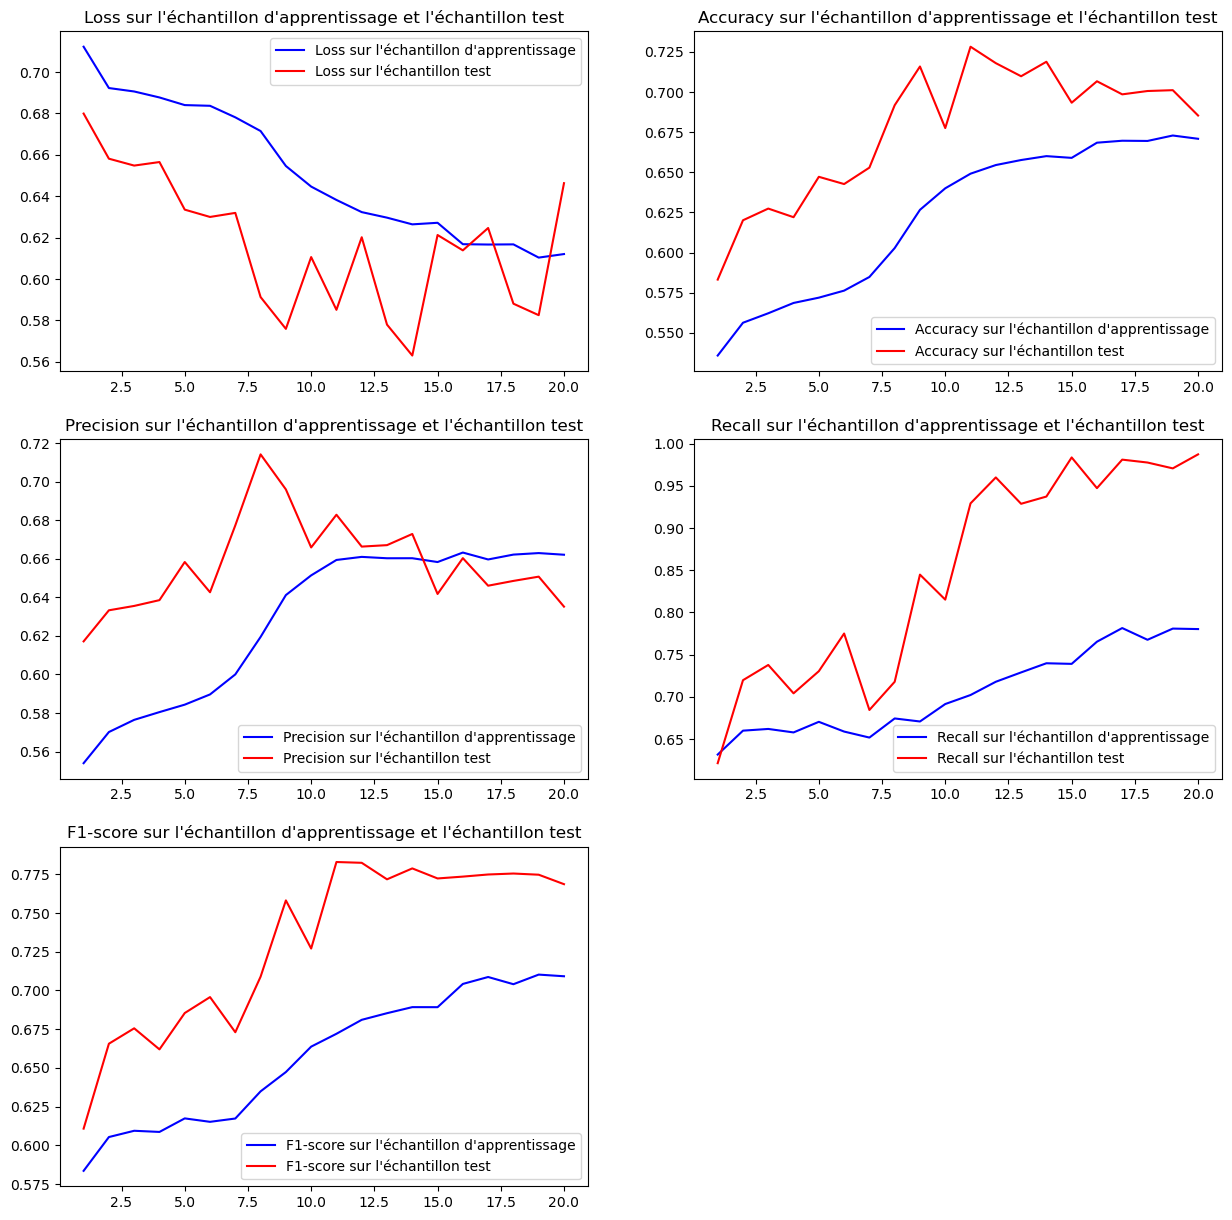

In [46]:
recall_best = history_best.history['recall_m']
val_recall_best = history_best.history['val_recall_m']

accuracy_best = history_best.history['Accuracy']
val_accuracy_best = history_best.history['val_Accuracy']

precision_best = history_best.history['precision_m']
val_precision_best = history_best.history['val_precision_m']

f1_best = history_best.history['f1_m']
val_f1_best = history_best.history['val_f1_m']

loss_best = history_best.history['loss']
val_loss_best = history_best.history['val_loss']

epochs_best = range(1, len(recall_best) + 1)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(epochs_best, loss_best, 'b', label="Loss sur l'échantillon d'apprentissage")
axs[0, 0].plot(epochs_best, val_loss_best, 'b', label="Loss sur l'échantillon test", color="red")
axs[0, 0].set_title("Loss sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 0].legend()

axs[0, 1].plot(epochs_best, accuracy_best, 'b', label="Accuracy sur l'échantillon d'apprentissage")
axs[0, 1].plot(epochs_best, val_accuracy_best, 'b', label="Accuracy sur l'échantillon test", color="red")
axs[0, 1].set_title("Accuracy sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 1].legend()

axs[1, 0].plot(epochs_best, precision_best, 'b', label="Precision sur l'échantillon d'apprentissage")
axs[1, 0].plot(epochs_best, val_precision_best, 'b', label="Precision sur l'échantillon test", color="red")
axs[1, 0].set_title("Precision sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 0].legend()

axs[1, 1].plot(epochs_best, recall_best, 'b', label="Recall sur l'échantillon d'apprentissage")
axs[1, 1].plot(epochs_best, val_recall_best, 'b', label="Recall sur l'échantillon test", color="red")
axs[1, 1].set_title("Recall sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 1].legend()

axs[2, 0].plot(epochs_best, f1_best, 'b', label="F1-score sur l'échantillon d'apprentissage")
axs[2, 0].plot(epochs_best, val_f1_best, 'b', label="F1-score sur l'échantillon test", color="red")
axs[2, 0].set_title("F1-score sur l'échantillon d'apprentissage et l'échantillon test")
axs[2, 0].legend()

fig.delaxes(axs[2,1]) # The indexing is zero-based here


In [47]:
loss_best_train, accuracy_best_train, recall_best_train, precision_best_train, f1score_best_train = best_model.evaluate(
    X_train_augmente_permute.numpy(), Y_train_augmente.numpy(), verbose=0)
print("Loss sur l'échantillon train: {}".format(round(loss_best_train, 3)))
print("Accuracy sur l'échantillon train: {}".format(round(accuracy_best_train, 3)))
print("Recall sur l'échantillon train: {}".format(round(recall_best_train, 3)))
print("Precision sur l'échantillon train: {}".format(round(precision_best_train, 3)))
print("F1-score sur l'échantillon train: {}".format(round(f1score_best_train, 3)))


Loss sur l'échantillon train: 0.619
Accuracy sur l'échantillon train: 0.69
Recall sur l'échantillon train: 0.935
Precision sur l'échantillon train: 0.643
F1-score sur l'échantillon train: 0.758


In [48]:
loss_best, accuracy_best, recall_best, precision_best, f1score_best = best_model.evaluate(
    X_test_augmente_permute.numpy(), Y_test_augmente.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss_best, 3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy_best, 3)))
print("Recall sur l'échantillon test: {}".format(round(recall_best, 3)))
print("Precision sur l'échantillon test: {}".format(round(precision_best, 3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score_best, 3)))


Loss sur l'échantillon test: 0.646
Accuracy sur l'échantillon test: 0.685
Recall sur l'échantillon test: 0.987
Precision sur l'échantillon test: 0.635
F1-score sur l'échantillon test: 0.769


In [49]:
best_predict = best_model.predict(X_test_augmente_permute.numpy())
best_y_pred = (np.squeeze(best_predict) > 0.5).astype("int32")


181/181 [==============================] - 0s 2ms/step


In [50]:
uni_best, compteur_best = np.unique(best_y_pred, return_counts=True)
res_best = dict(zip(uni_best, compteur_best))
print("Nombre d'images prédites avec panneaux: {}".format(res_best[1]))
print("Nombre d'images prédites sans panneau: {}".format(res_best[0]))


Nombre d'images prédites avec panneaux: 4850
Nombre d'images prédites sans panneau: 912


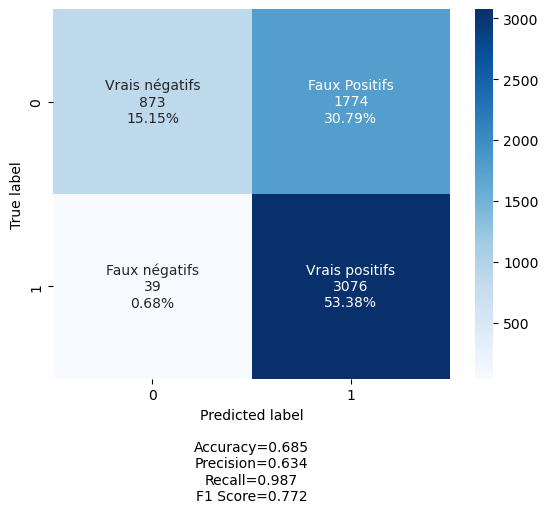

In [51]:
r = confusion_matrix(Y_test_augmente, best_y_pred)

labels = ["Vrais négatifs", "Faux Positifs", "Faux négatifs", "Vrais positifs"]
categories = ["0", "1"]
make_confusion_matrix(r,
                      group_names=labels,
                      categories=categories,
                      )


In [52]:
FPR_best, TPR_best, thresholds_keras_best = roc_curve(
    Y_test_augmente.numpy(), best_predict)
AUC_best = auc(FPR_best, TPR_best)
print("AUC: {}".format(round(AUC_best, 2)))


AUC: 0.78


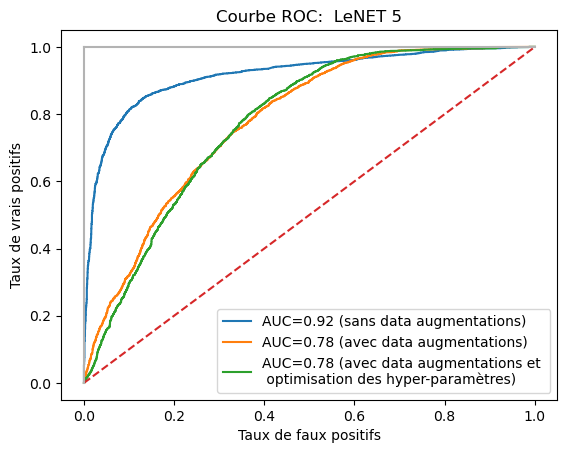

In [53]:
plt.title('Courbe ROC:  LeNET 5')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC, 2)) +
         " (sans data augmentations)")
plt.plot(FPR_augmente, TPR_augmente, label="AUC=" +
         str(round(AUC_augmente, 2))+" (avec data augmentations)")
plt.plot(FPR_best, TPR_best, label="AUC="+str(round(AUC_best, 2)) +
         " (avec data augmentations et \n optimisation des hyper-paramètres)")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()
